In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [3]:
institution_source_of_funds_data = pd.read_csv("/content/drive/MyDrive/institution_source_of_funds_data.csv")
institution_source_of_funds_data

,Unnamed: 0,Institution,Rank,All R&D Expenditures,Federal Government,State and Local Government,Institution Funds,Business,Nonprofit Organizations,All Other Sources
0,2,"U. California, San Francisco",1,1805950.0,780318,NaN,40658.0,NaN,438949.0,NaN
1,3,"U. Michigan, Ann Arbor",2,1770708.0,970636,NaN,1592.0,NaN,612187.0,NaN
2,4,"U. Washington, Seattle",3,1559708.0,1083090,NaN,19188.0,NaN,117096.0,NaN
3,5,"U. California, Los Angeles",4,1536197.0,848138,NaN,89554.0,NaN,287147.0,NaN
4,6,"U. California, San Diego",5,1533357.0,970696,NaN,58556.0,NaN,213400.0,NaN
...,...,...,...,...,...,...,...,...,...,...
405,407,Nevada State C.,406,1191.0,1167,NaN,0.0,NaN,22.0,NaN
406,408,"SUNY, C. Plattsburgh",407,1043.0,584,NaN,46.0,NaN,334.0,NaN
407,409,Central Connecticut State U.,408,1035.0,511,NaN,58.0,NaN,459.0,NaN
408,410,Plymouth State U.,409,669.0,571,NaN,0.0,NaN,84.0,NaN


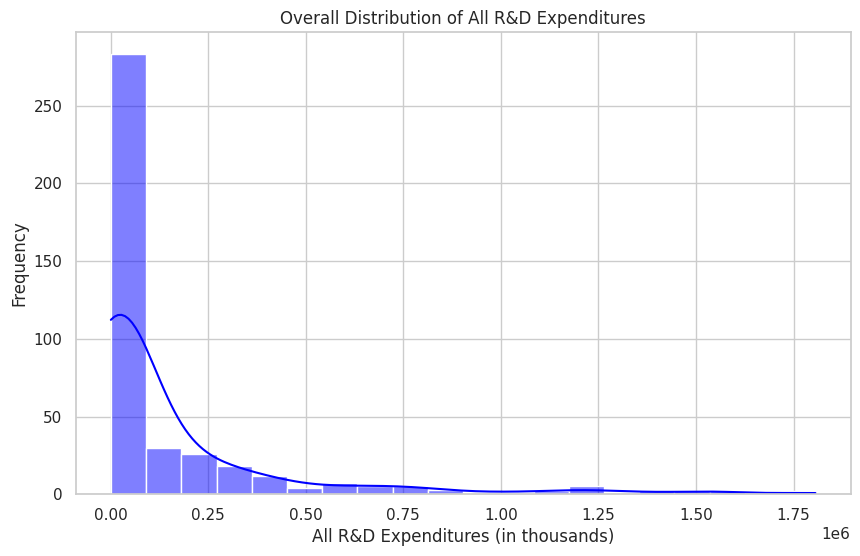

<ipython-input-4-a8f154941277>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Institution', x='All R&D Expenditures', data=top_institutions, palette="viridis")


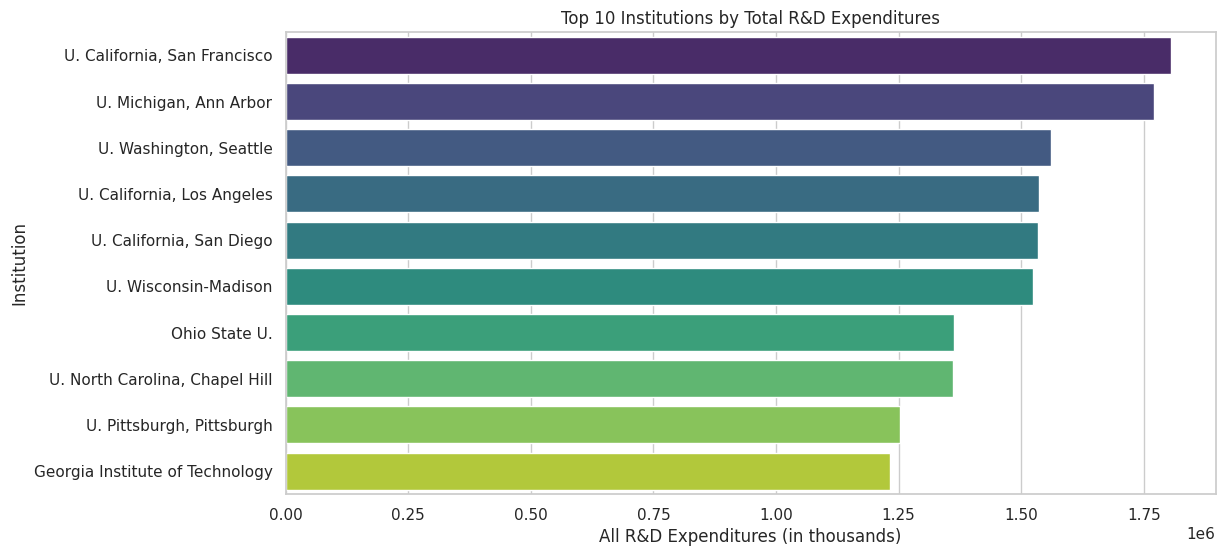

<ipython-input-4-a8f154941277>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Institution', x='Federal Government', data=top_institutions, palette="plasma")


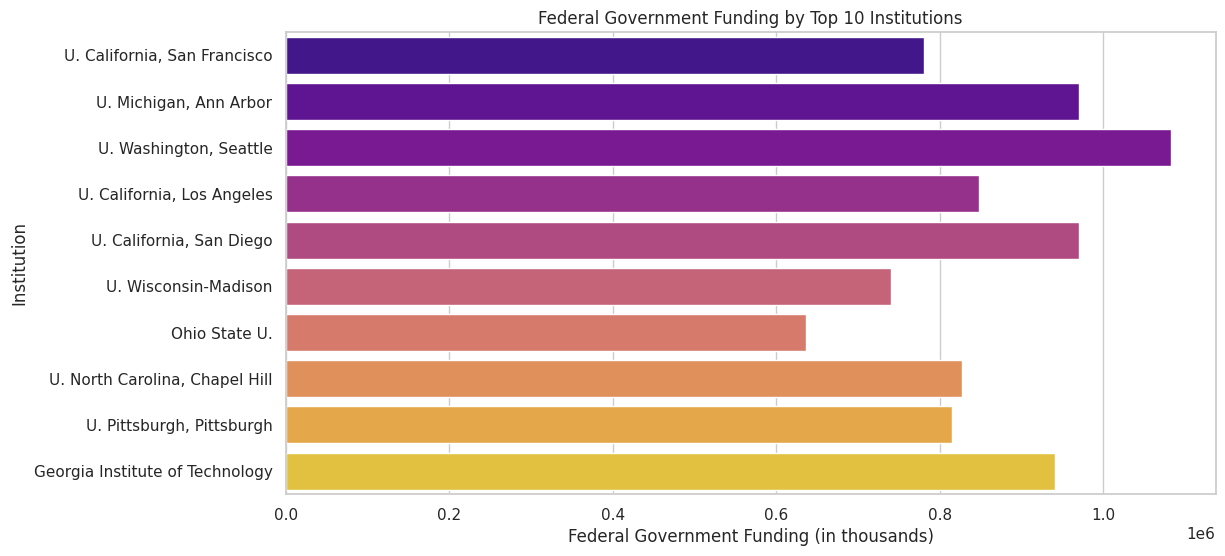

<ipython-input-4-a8f154941277>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Funding Source', y='Expenditure', data=data_melted, palette="Set3")


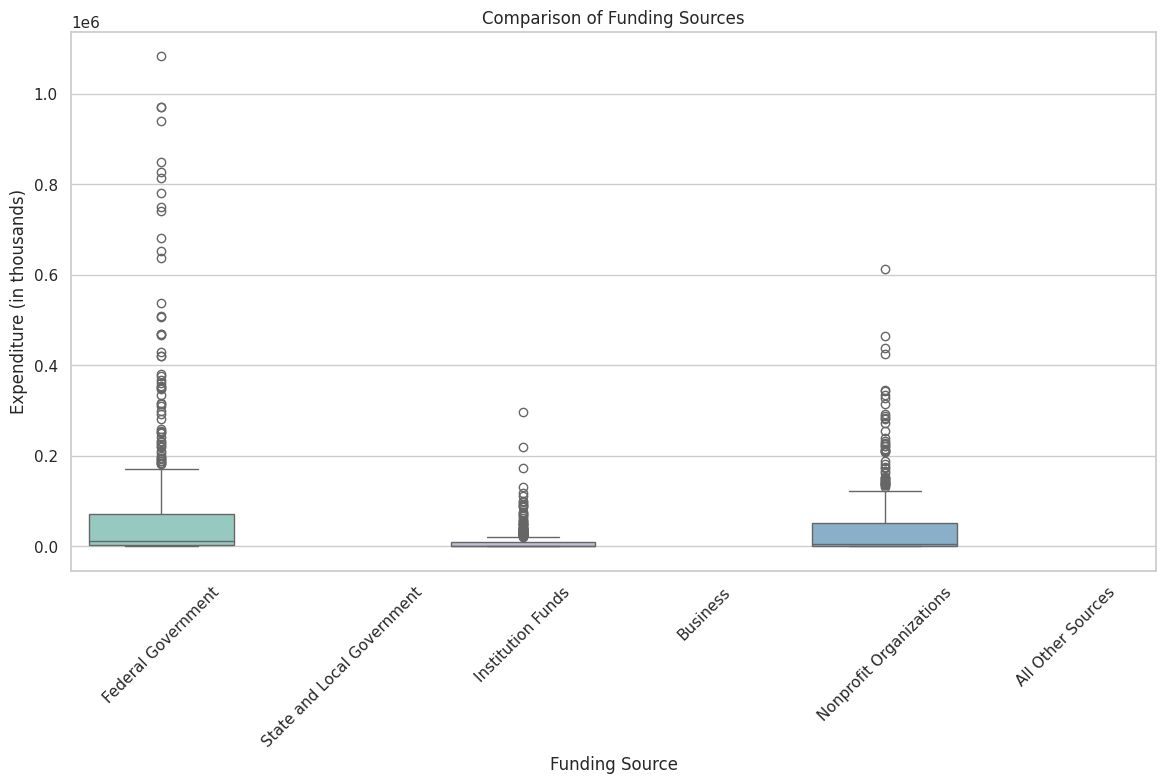

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# Visualization 1: Overall Distribution of All R&D Expenditures
plt.figure(figsize=(10, 6))
sns.histplot(institution_source_of_funds_data['All R&D Expenditures'], bins=20, kde=True, color='blue')
plt.title('Overall Distribution of All R&D Expenditures')
plt.xlabel('All R&D Expenditures (in thousands)')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Top 10 Institutions by Total R&D Expenditures
top_institutions = institution_source_of_funds_data.nlargest(10, 'All R&D Expenditures')
plt.figure(figsize=(12, 6))
sns.barplot(y='Institution', x='All R&D Expenditures', data=top_institutions, palette="viridis")
plt.title('Top 10 Institutions by Total R&D Expenditures')
plt.xlabel('All R&D Expenditures (in thousands)')
plt.ylabel('Institution')
plt.show()

# Visualization 3: Distribution of Federal Government Funding by Top 10 Institutions
plt.figure(figsize=(12, 6))
sns.barplot(y='Institution', x='Federal Government', data=top_institutions, palette="plasma")
plt.title('Federal Government Funding by Top 10 Institutions')
plt.xlabel('Federal Government Funding (in thousands)')
plt.ylabel('Institution')
plt.show()

# Visualization 4: Comparison of Funding Sources (Boxplot)
funding_sources = ['Federal Government', 'State and Local Government',
                   'Institution Funds', 'Business',
                   'Nonprofit Organizations', 'All Other Sources']
data_melted = institution_source_of_funds_data.melt(id_vars=['Institution'], value_vars=funding_sources,
                                var_name='Funding Source', value_name='Expenditure')

plt.figure(figsize=(14, 7))
sns.boxplot(x='Funding Source', y='Expenditure', data=data_melted, palette="Set3")
plt.title('Comparison of Funding Sources')
plt.xlabel('Funding Source')
plt.ylabel('Expenditure (in thousands)')
plt.xticks(rotation=45)
plt.show()


In [5]:
field_source_of_funds_data = pd.read_csv("/content/drive/MyDrive/field_source_of_funds.csv")
field_source_of_funds_data

,Unnamed: 0,Field,All R&D Expenditures,Federal Government,State and Local Government,Institution Funds,Business,Nonprofit Organizations,All Other Sources
0,1,All R&D fields,97680528.0,53971468,4907199,24492663,5701656,5974155,2633387
1,2,Science,76226286.0,42786338,3660829,18362439,4376552,4979772,2060356
2,3,Computer and information sciences,3224949.0,2184767,76545,652629,164698,87070,59240
3,4,"Geosciences, atmospheric sciences, and ocean s...",3690235.0,2478702,218642,680423,90513,148997,72958
4,5,Atmospheric science and meteorology,668918.0,528068,17169,93954,8144,14213,7370
5,6,Geological and earth sciences,1370650.0,875493,66599,288039,48475,58672,33372
6,7,Ocean sciences and marine sciences,1211130.0,785545,107877,223759,22019,50512,21418
7,8,"Geosciences, atmospheric sciences, and ocean s...",439537.0,289596,26997,74671,11875,25600,10798
8,9,Life sciences,56498207.0,30958717,2929174,13333506,3840001,3799516,1637293
9,10,Agricultural sciences,3935731.0,1265977,990784,1253587,140477,146190,138716


<ipython-input-6-9a4288b5dcc5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Field', x='All R&D Expenditures', data=field_source_of_funds_data, palette="viridis")


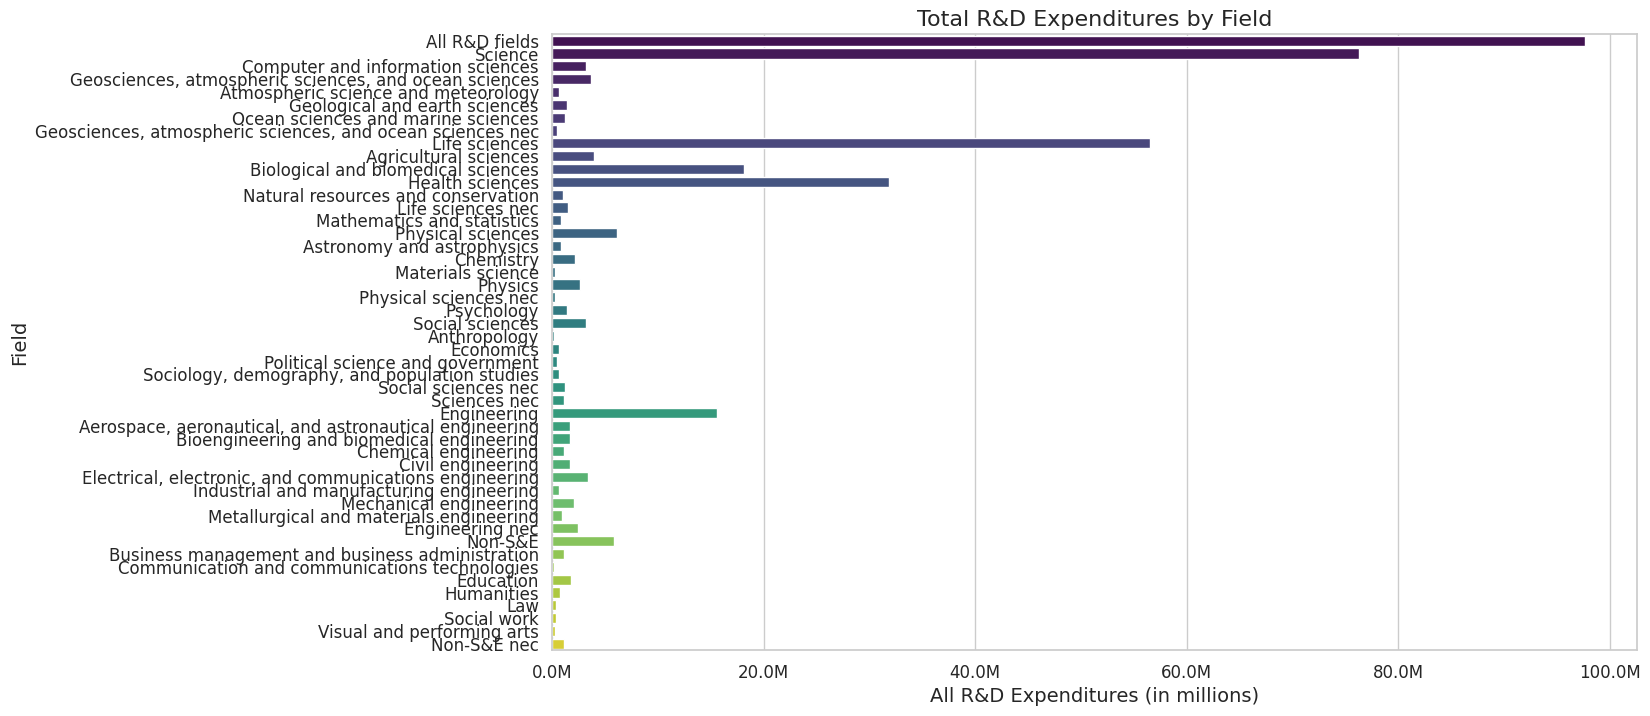

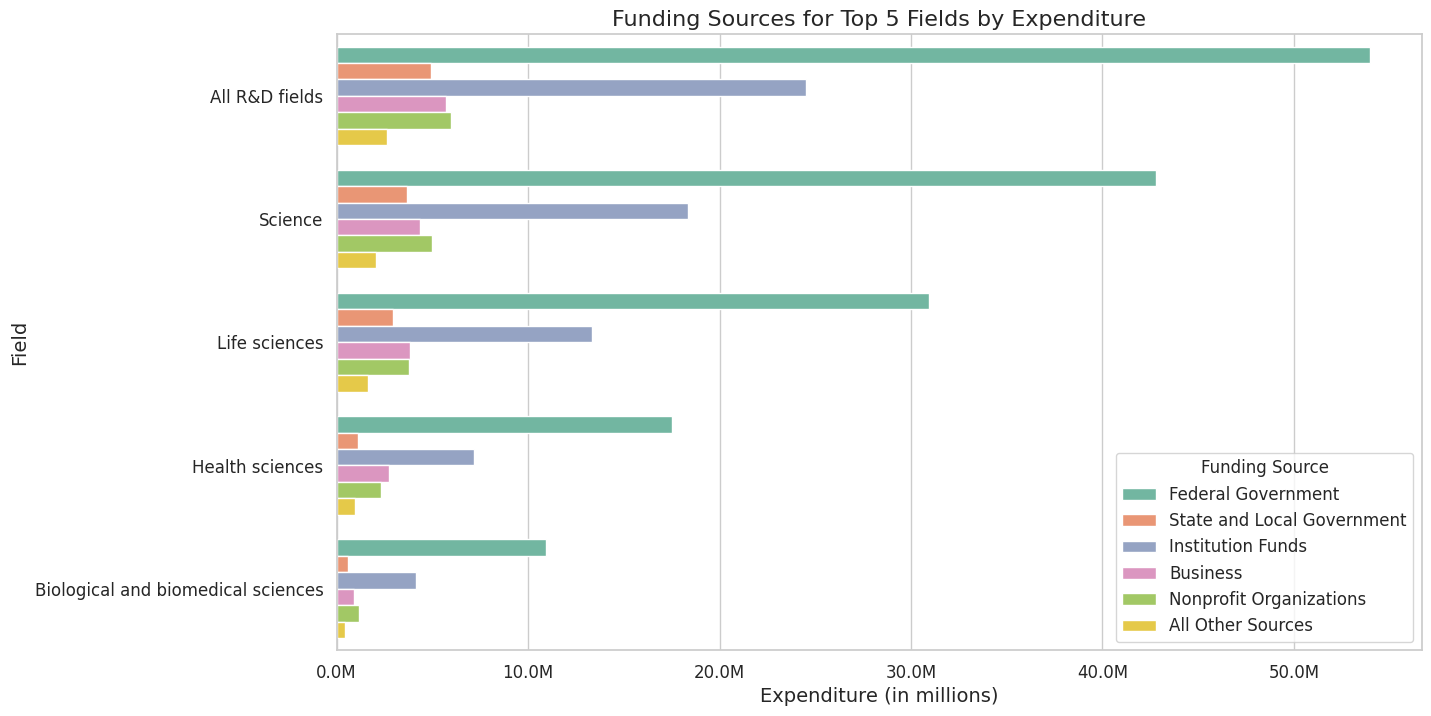

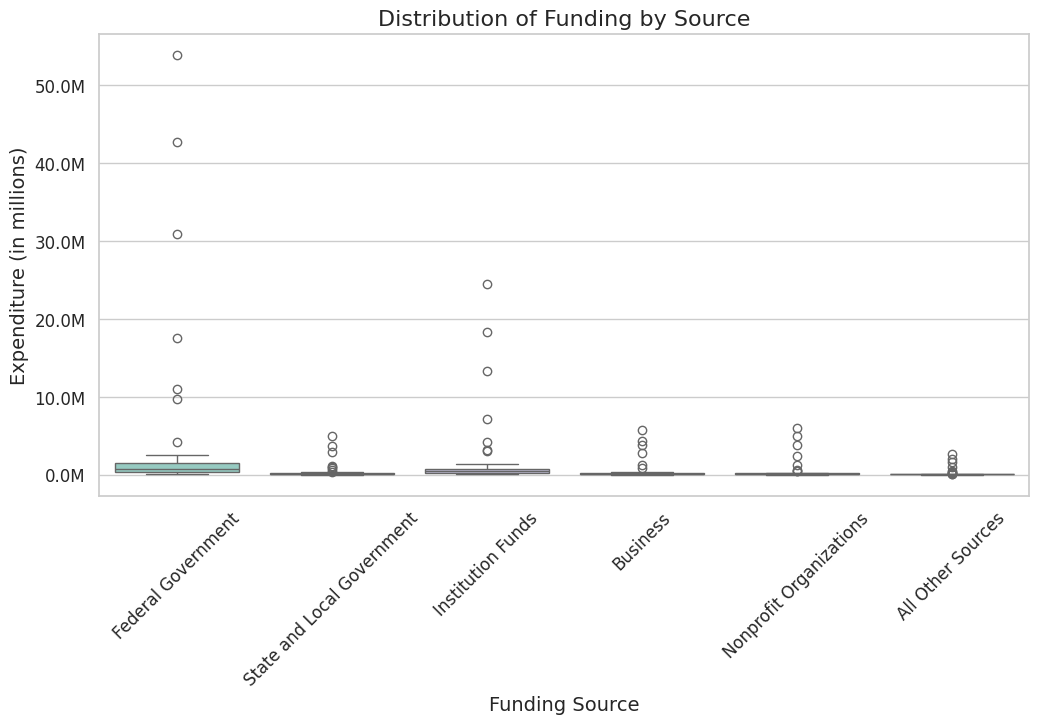

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set a style for the plots
sns.set(style="whitegrid")

# Visualization 1: Total R&D Expenditures by Field
plt.figure(figsize=(14, 8))
sns.barplot(y='Field', x='All R&D Expenditures', data=field_source_of_funds_data, palette="viridis")
plt.title('Total R&D Expenditures by Field', fontsize=16)
plt.xlabel('All R&D Expenditures (in millions)', fontsize=14)
plt.ylabel('Field', fontsize=14)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tick_params(axis='both', labelsize=12)
plt.show()

# Visualization 2: Distribution of Funding Sources for Top Fields
top_fields = field_source_of_funds_data.nlargest(5, 'All R&D Expenditures')  # Top 5 fields by R&D expenditure
funding_sources = ['Federal Government', 'State and Local Government',
                   'Institution Funds', 'Business',
                   'Nonprofit Organizations', 'All Other Sources']
data_melted = top_fields.melt(id_vars=['Field'], value_vars=funding_sources,
                              var_name='Funding Source', value_name='Expenditure')

plt.figure(figsize=(14, 8))
sns.barplot(x='Expenditure', y='Field', hue='Funding Source', data=data_melted, palette="Set2")
plt.title('Funding Sources for Top 5 Fields by Expenditure', fontsize=16)
plt.xlabel('Expenditure (in millions)', fontsize=14)
plt.ylabel('Field', fontsize=14)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.legend(title='Funding Source', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()

# Visualization 3: Overall Distribution of Funding by Source
plt.figure(figsize=(12, 6))
sns.boxplot(data=field_source_of_funds_data[funding_sources], palette="Set3")
plt.title('Distribution of Funding by Source', fontsize=16)
plt.xlabel('Funding Source', fontsize=14)
plt.ylabel('Expenditure (in millions)', fontsize=14)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y/1e6:.1f}M'))
plt.xticks(rotation=45, fontsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()


In [7]:
dataset = pd.read_csv("/content/drive/MyDrive/data3.csv")
dataset

,University,Year,US News Ranking,Field of Study,Source of Funds,Region,Funding Amount,Total Publications,University Population,Current GDP (in billions)
0,MIT,2022,19,Arts,State,South,7569.93,139,43450,1.8
1,University of Chicago,2016,28,Business,Federal,Midwest,4299.18,78,20047,1.5
2,Yale University,2021,40,Engineering,State,South,7973.55,484,13084,1.8
3,University of Michigan,2015,84,Engineering,International,Northeast,8451.44,354,26751,2.2
4,Princeton University,2015,97,Engineering,State,Northeast,9105.72,476,21453,2.2
...,...,...,...,...,...,...,...,...,...,...
995,Columbia University,2015,34,Arts,Private,Northeast,8524.96,354,27763,2.2
996,University of Chicago,2021,61,Business,Business,Midwest,7085.62,403,15116,1.5
997,Stanford University,2018,4,Arts,Federal,South,7336.12,335,20733,1.8
998,University of Michigan,2016,88,Arts,Business,West,9314.39,377,30502,2.5


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import xgboost as xgb
from sklearn.linear_model import LinearRegression

# One-hot encode categorical features
dataset_encoded = pd.get_dummies(dataset, columns=["Field of Study", "Source of Funds", "Region"], drop_first=True)

# Define features and target variable
X = dataset_encoded.drop(columns=["University", "Year", "Funding Amount"])  # Use all except specified columns
y = dataset["Funding Amount"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression() ,
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "k-NN": KNeighborsRegressor(n_neighbors=5),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, seed=42)
}

# Train, predict, and evaluate each model
results = []
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    end_time = time.time()
    elapsed_time = end_time - start_time
    results.append({"Model": model_name, "Mean Absolute Error": mae, "Mean Squared Error": mse, "R^2 Score": r2, "Execution time (secs)": elapsed_time})

# Train, predict, and evaluate each model
results_train = []
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    end_time = time.time()
    elapsed_time = end_time - start_time
    results_train.append({"Model": model_name, "Mean Absolute Error": mae, "Mean Squared Error": mse, "R^2 Score": r2, "Execution time (secs)": elapsed_time})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

results_train_df = pd.DataFrame(results_train)

# Display the results
print(results_df)


               Model  Mean Absolute Error  Mean Squared Error  R^2 Score  \
0  Linear Regression            20.826733         1111.089898   0.999676   
1      Random Forest           184.680649        50444.008350   0.985278   
2               k-NN           797.671110       957715.401017   0.720491   
3     Neural Network           566.663472       477448.959557   0.860657   
4            XGBoost           140.987176        30547.673215   0.991085   

   Execution time (secs)  
0               0.026651  
1               0.714541  
2               0.010599  
3               2.671873  
4               1.537532  


In [9]:
results_df

,Model,Mean Absolute Error,Mean Squared Error,R^2 Score,Execution time (secs)
0,Linear Regression,20.826733,1111.089898,0.999676,0.026651
1,Random Forest,184.680649,50444.008350,0.985278,0.714541
2,k-NN,797.671110,957715.401017,0.720491,0.010599
3,Neural Network,566.663472,477448.959557,0.860657,2.671873
4,XGBoost,140.987176,30547.673215,0.991085,1.537532


In [10]:
results_train_df

,Model,Mean Absolute Error,Mean Squared Error,R^2 Score,Execution time (secs)
0,Linear Regression,21.229515,933.260241,0.999734,0.007737
1,Random Forest,66.507044,7239.134716,0.997937,0.507826
2,k-NN,541.324755,464628.653052,0.867621,0.009291
3,Neural Network,512.952434,420695.333600,0.880138,1.098814
4,XGBoost,5.563341,64.612710,0.999982,0.205154


In [11]:
results_df, results_train_df

(               Model  Mean Absolute Error  Mean Squared Error  R^2 Score  \
 0  Linear Regression            20.826733         1111.089898   0.999676   
 1      Random Forest           184.680649        50444.008350   0.985278   
 2               k-NN           797.671110       957715.401017   0.720491   
 3     Neural Network           566.663472       477448.959557   0.860657   
 4            XGBoost           140.987176        30547.673215   0.991085   
 
    Execution time (secs)  
 0               0.026651  
 1               0.714541  
 2               0.010599  
 3               2.671873  
 4               1.537532  ,
                Model  Mean Absolute Error  Mean Squared Error  R^2 Score  \
 0  Linear Regression            21.229515          933.260241   0.999734   
 1      Random Forest            66.507044         7239.134716   0.997937   
 2               k-NN           541.324755       464628.653052   0.867621   
 3     Neural Network           512.952434       420695.333

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# One-hot encode categorical features
dataset_encoded = pd.get_dummies(dataset, columns=["Field of Study", "Source of Funds", "Region"], drop_first=True)

# Define features and target variable
X = dataset_encoded.drop(columns=["University", "Year", "Funding Amount"])  # Use all except specified columns
y = dataset["Funding Amount"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with StandardScaler and RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Apply standard scaling
    ('model', RandomForestRegressor(random_state=42))  # Random Forest model
])

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],  # Number of trees
    'model__max_depth': [10, 20, None],     # Depth of trees
    'model__min_samples_split': [2, 5, 10], # Min samples to split a node
    'model__min_samples_leaf': [1, 2, 4]    # Min samples in a leaf node
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best model and evaluate it
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
best_mae = mean_absolute_error(y_test, y_pred)
best_mse = mean_squared_error(y_test, y_pred)
best_r2 = r2_score(y_test, y_pred)

# Save results
best_params = grid_search.best_params_
results = {
    "Best Parameters": best_params,
    "Mean Absolute Error": best_mae,
    "Mean Squared Error": best_mse,
    "R^2 Score": best_r2
}

# Output the results
print(results)


{'Best Parameters': {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}, 'Mean Absolute Error': 182.22843199999997, 'Mean Squared Error': 49408.43790838427, 'R^2 Score': 0.985580185047818}


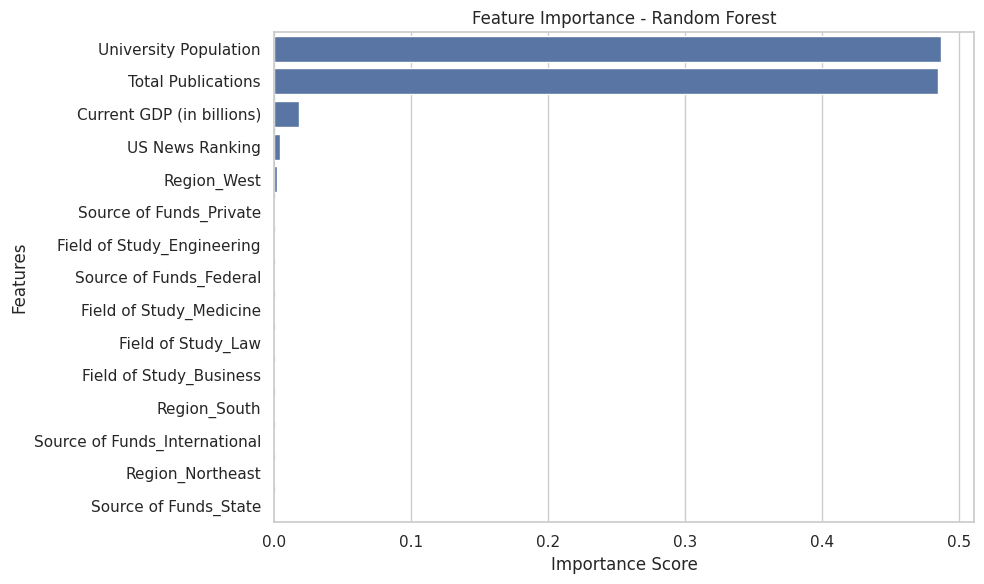

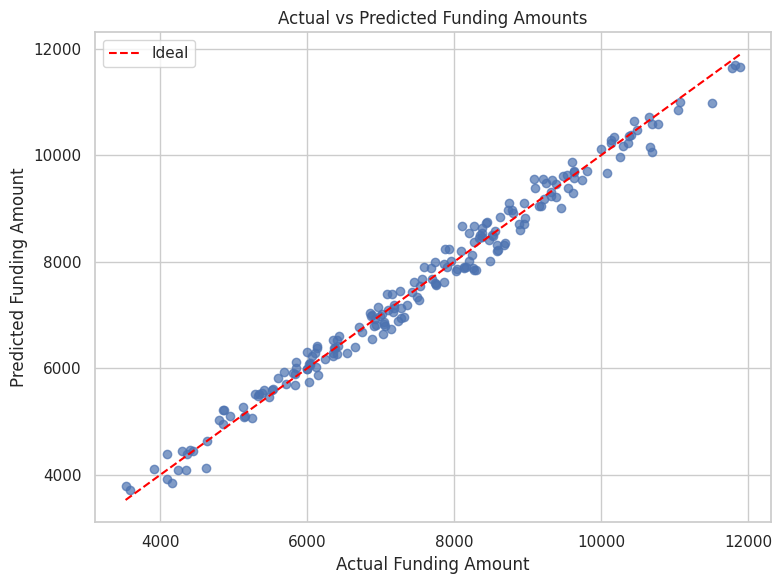

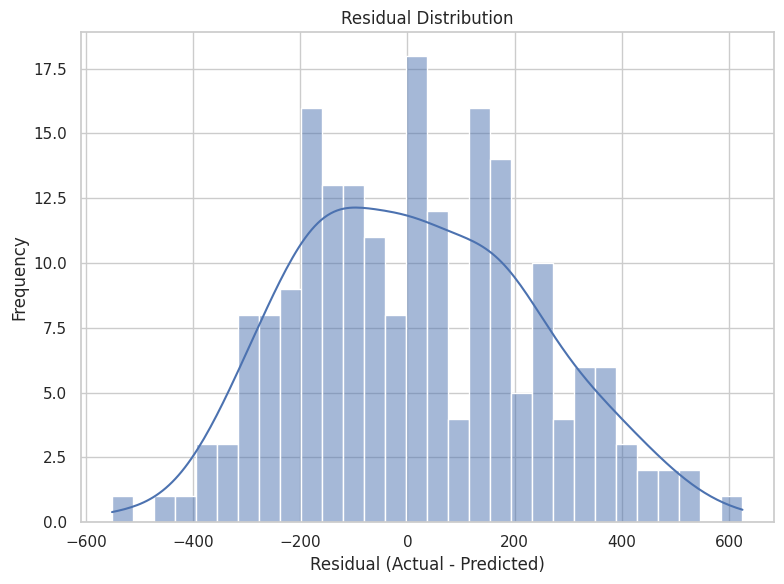

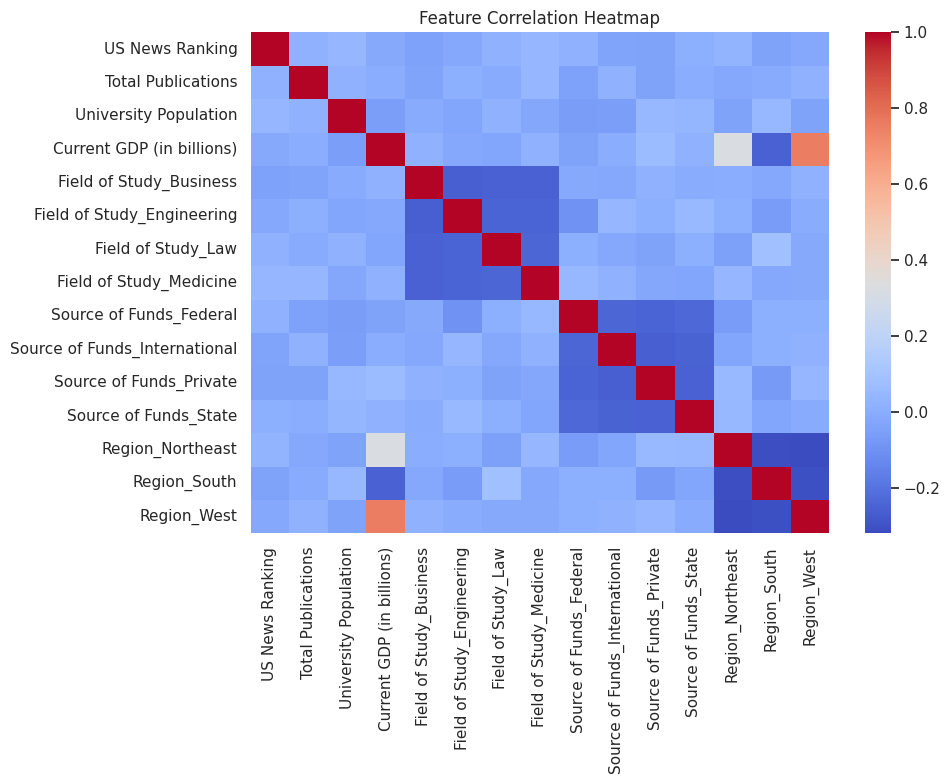

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of results for Random Forest

# 1. Feature Importance Bar Plot
feature_importances = best_model.named_steps['model'].feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 2. Scatter Plot of Actual vs Predicted Values
y_pred = best_model.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal")
plt.title("Actual vs Predicted Funding Amounts")
plt.xlabel("Actual Funding Amount")
plt.ylabel("Predicted Funding Amount")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4. Heatmap of Feature Correlations
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
